# Moving Rating Analysis Project

## Import necessary libraries

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the dataset

In [37]:

# Load the dataset
# Replace 'movies.csv' with your file name if different
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\imdb_top_1000.csv")

## Display the first few rows to understand the dataset

In [38]:

# Display the first few rows to understand the dataset
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

## --- Data Cleaning ---

In [39]:

# --- Data Cleaning ---
# Convert 'Gross' column to numeric format
# If there are non-numeric values, they will be replaced with NaN
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


## Check if there are any remaining missing values in the dataset

In [40]:

# Check if there are any remaining missing values in the dataset
print(df.isnull().sum())


Poster_Link         0
Series_Title        0
Released_Year       0
Certificate       101
Runtime             0
Genre               0
IMDB_Rating         0
Overview            0
Meta_score        157
Director            0
Star1               0
Star2               0
Star3               0
Star4               0
No_of_Votes         0
Gross            1000
dtype: int64


# --- Exploratory Data Analysis ---

## 1. Top 10 Movies by IMDb Rating

In [41]:

# --- Exploratory Data Analysis ---

# 1. Top 10 Movies by IMDb Rating
top_rated_movies = df.nlargest(10, 'IMDB_Rating')  # Get the top 10 movies
print("Top 10 Movies by IMDb_Rating:")
print(top_rated_movies[['Series_Title', 'IMDB_Rating', 'Director']])


Top 10 Movies by IMDb_Rating:
                                    Series_Title  IMDB_Rating  \
0                       The Shawshank Redemption          9.3   
1                                  The Godfather          9.2   
2                                The Dark Knight          9.0   
3                         The Godfather: Part II          9.0   
4                                   12 Angry Men          9.0   
5  The Lord of the Rings: The Return of the King          8.9   
6                                   Pulp Fiction          8.9   
7                               Schindler's List          8.9   
8                                      Inception          8.8   
9                                     Fight Club          8.8   

               Director  
0        Frank Darabont  
1  Francis Ford Coppola  
2     Christopher Nolan  
3  Francis Ford Coppola  
4          Sidney Lumet  
5         Peter Jackson  
6     Quentin Tarantino  
7      Steven Spielberg  
8     Christopher No

## 2. Genre Distribution

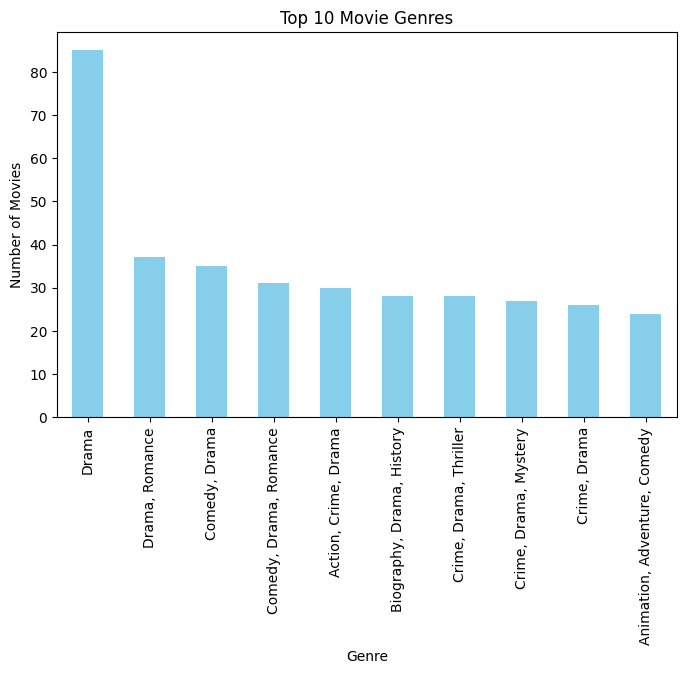

In [42]:
# 2. Genre Distribution
# Count the number of movies for each genre
genre_counts = df['Genre'].value_counts()
genre_counts.head(10).plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

## 3. Yearly Average IMDb Ratings

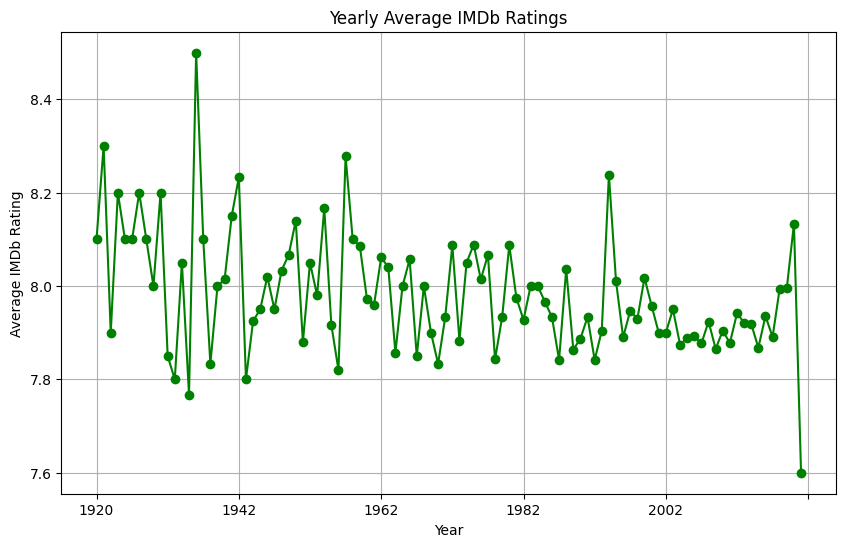

In [43]:
# 3. Yearly Average IMDb Ratings
# Calculate average IMDb Rating per year
yearly_avg_ratings = df.groupby('Released_Year')['IMDB_Rating'].mean()
yearly_avg_ratings.plot(kind='line', marker='o', color='green', figsize=(10, 6))
plt.title('Yearly Average IMDb Ratings')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.grid()
plt.show()

## 4. Relationship Between Votes and IMDb Rating

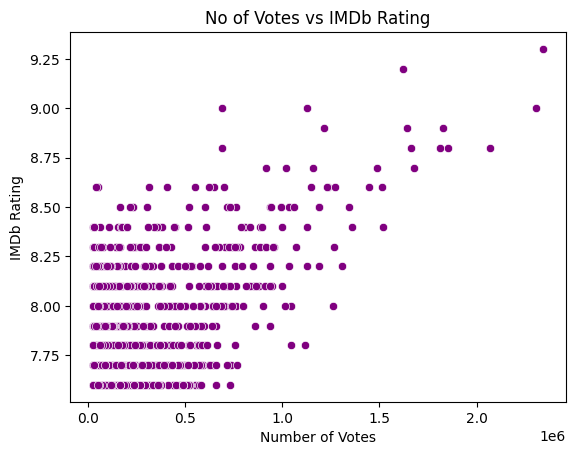

In [44]:
# 4. Relationship Between Votes and IMDb Rating
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df, color='purple')
plt.title('No of Votes vs IMDb Rating')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Rating')
plt.show()

## 5. Meta Score vs IMDb Rating

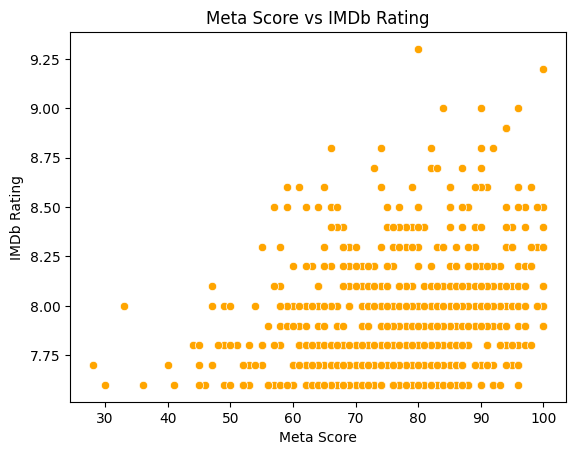

In [45]:
# 5. Meta Score vs IMDb Rating
# Convert 'Meta Score' to numeric if necessary
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df, color='orange')
plt.title('Meta Score vs IMDb Rating')
plt.xlabel('Meta Score')
plt.ylabel('IMDb Rating')
plt.show()


## 6. Total Gross Revenue by Genre

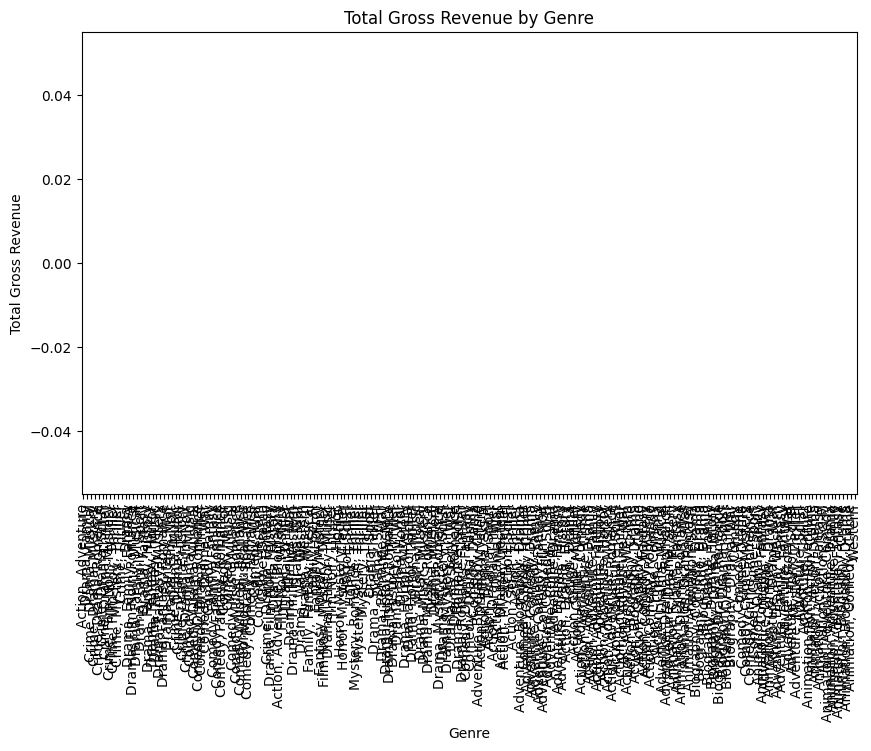

In [46]:
# 6. Total Gross Revenue by Genre
# Group by Genre and calculate total Gross
genre_gross = df.groupby('Genre')['Gross'].sum().sort_values(ascending=False)
genre_gross.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Total Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue')
plt.show()

## 7. Top 10 Grossing Movies

In [47]:
# 7. Top 10 Grossing Movies
top_grossing_movies = df.nlargest(10, 'Gross')
print("Top 10 Grossing Movies:")
print(top_grossing_movies[['Series_Title', 'Gross', 'Director']])


Top 10 Grossing Movies:
                                    Series_Title  Gross              Director
0                       The Shawshank Redemption    NaN        Frank Darabont
1                                  The Godfather    NaN  Francis Ford Coppola
2                                The Dark Knight    NaN     Christopher Nolan
3                         The Godfather: Part II    NaN  Francis Ford Coppola
4                                   12 Angry Men    NaN          Sidney Lumet
5  The Lord of the Rings: The Return of the King    NaN         Peter Jackson
6                                   Pulp Fiction    NaN     Quentin Tarantino
7                               Schindler's List    NaN      Steven Spielberg
8                                      Inception    NaN     Christopher Nolan
9                                     Fight Club    NaN         David Fincher


## Moving Rating Analysis Project

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

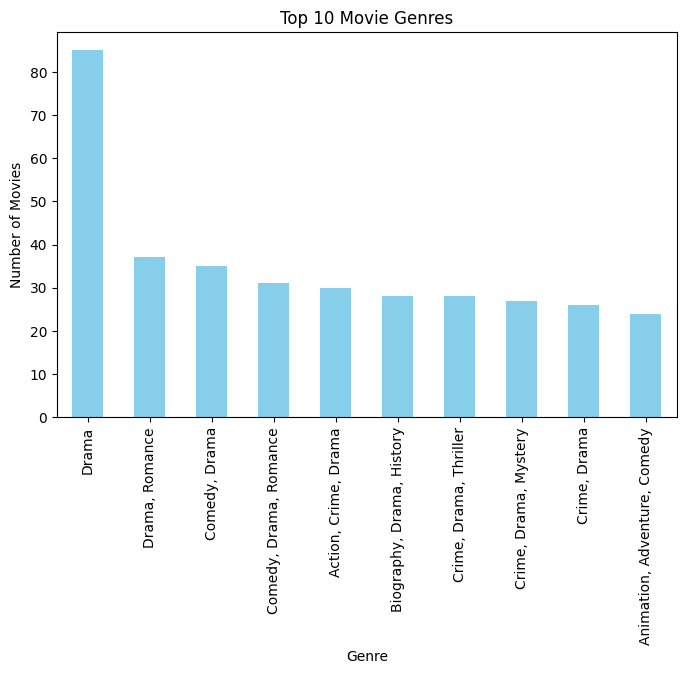

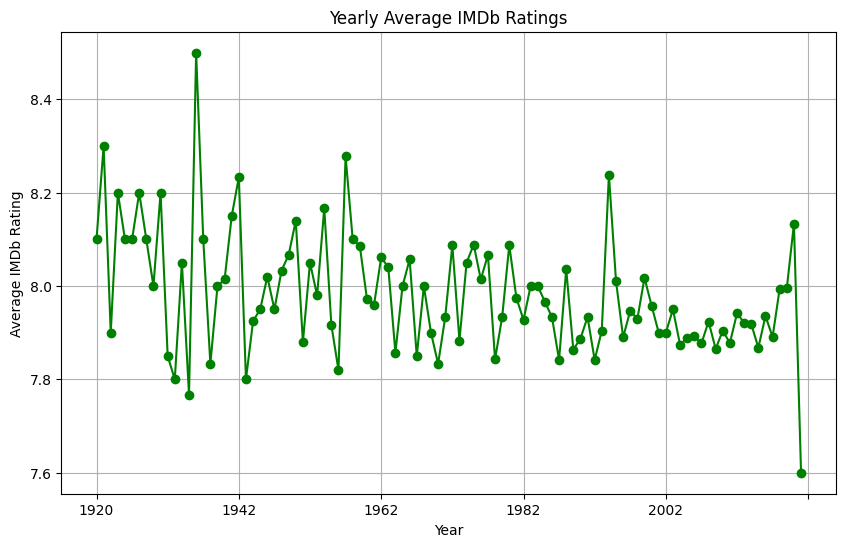

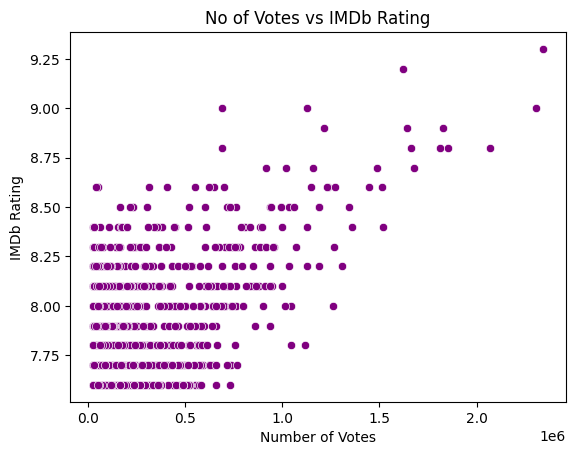

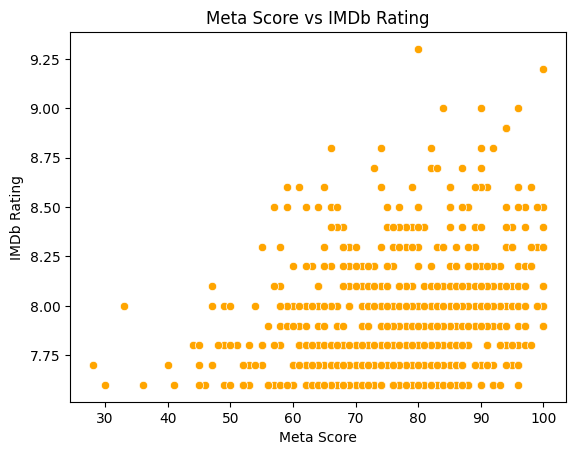

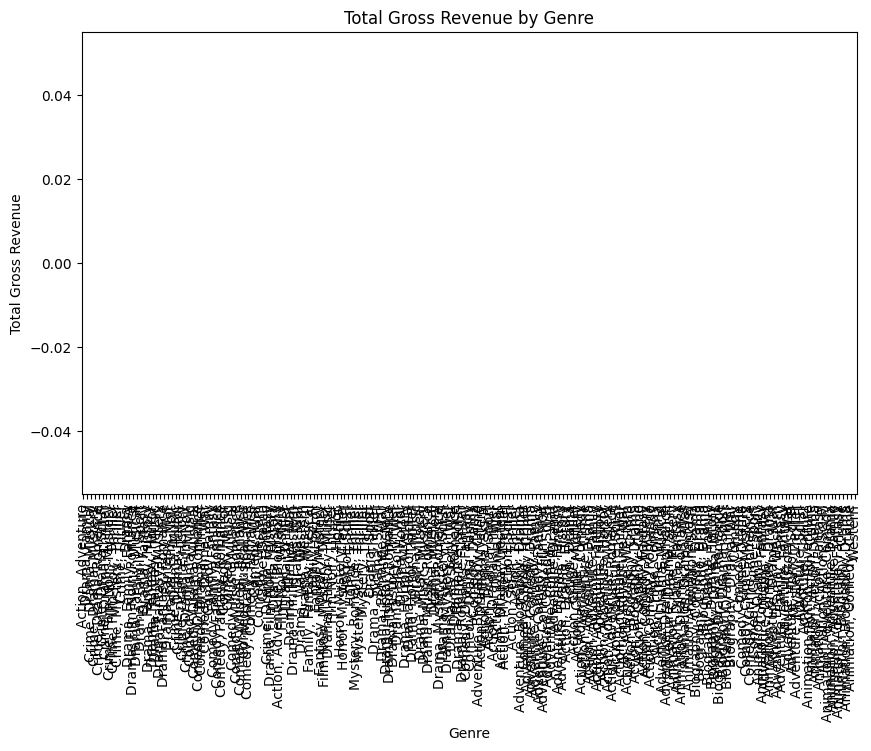

Top 10 Grossing Movies:
                                    Series_Title  Gross              Director
0                       The Shawshank Redemption    NaN        Frank Darabont
1                                  The Godfather    NaN  Francis Ford Coppola
2                                The Dark Knight    NaN     Christopher Nolan
3                         The Godfather: Part II    NaN  Francis Ford Coppola
4                                   12 Angry Men    NaN          Sidney Lumet
5  The Lord of the Rings: The Return of the King    NaN         Peter Jackson
6                                   Pulp Fiction    NaN     Quentin Tarantino
7                               Schindler's List    NaN      Steven Spielberg
8                                      Inception    NaN     Christopher Nolan
9                                     Fight Club    NaN         David Fincher


In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'movies.csv' with your file name if different
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\imdb_top_1000.csv")

# Display the first few rows to understand the dataset
print(df.head())

# --- Data Cleaning ---
# Convert 'Gross' column to numeric format
# If there are non-numeric values, they will be replaced with NaN
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


# Check if there are any remaining missing values in the dataset
print(df.isnull().sum())

# --- Exploratory Data Analysis ---

# 1. Top 10 Movies by IMDb Rating
top_rated_movies = df.nlargest(10, 'IMDB_Rating')  # Get the top 10 movies
print("Top 10 Movies by IMDb_Rating:")
print(top_rated_movies[['Series_Title', 'IMDB_Rating', 'Director']])

# 2. Genre Distribution
# Count the number of movies for each genre
genre_counts = df['Genre'].value_counts()
genre_counts.head(10).plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

# 3. Yearly Average IMDb Ratings
# Calculate average IMDb Rating per year
yearly_avg_ratings = df.groupby('Released_Year')['IMDB_Rating'].mean()
yearly_avg_ratings.plot(kind='line', marker='o', color='green', figsize=(10, 6))
plt.title('Yearly Average IMDb Ratings')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.grid()
plt.show()

# 4. Relationship Between Votes and IMDb Rating
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=df, color='purple')
plt.title('No of Votes vs IMDb Rating')
plt.xlabel('Number of Votes')
plt.ylabel('IMDb Rating')
plt.show()

# 5. Meta Score vs IMDb Rating
# Convert 'Meta Score' to numeric if necessary
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df, color='orange')
plt.title('Meta Score vs IMDb Rating')
plt.xlabel('Meta Score')
plt.ylabel('IMDb Rating')
plt.show()

# 6. Total Gross Revenue by Genre
# Group by Genre and calculate total Gross
genre_gross = df.groupby('Genre')['Gross'].sum().sort_values(ascending=False)
genre_gross.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Total Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue')
plt.show()

# 7. Top 10 Grossing Movies
top_grossing_movies = df.nlargest(10, 'Gross')
print("Top 10 Grossing Movies:")
print(top_grossing_movies[['Series_Title', 'Gross', 'Director']])

# --- Conclusion ---
# Insights from the analysis:
# 1. The highest-rated movies have these common traits: [Your observations]
# 2. Genre trends: Most common genres are [Your observations].
# 3. High correlation between number of votes and IMDb ratings.
# 4. [Additional insights based on your analysis]
# End of analysis